### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [7]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [ ]:
X[1].min(), X[1].max()

In [ ]:
X[2].min(), X[2].max()

In [ ]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

In [ ]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

In [ ]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

Стандартизация

In [ ]:
plt.hist(X[1])
plt.show()

In [ ]:
plt.hist(X[2])
plt.show()

In [ ]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

In [ ]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

In [ ]:
plt.hist(X_st[1])
plt.show()

In [ ]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

sklearn.StandartScaler() #Стандартизайия
sklearn.MinMaxScaler() #Нормализация

In [ ]:
X_st[2] = calc_std_fit(X[2])

In [ ]:
X_st[3] = calc_std_fit(X[3])
X_st

SGD (Stochastic gradient descent)

In [ ]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [ ]:
W = np.random.randn(X.shape[0])
W

In [ ]:
# классический  GD
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [ ]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

In [ ]:
# стохастический GS
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [ ]:
eval_sgd_model(X_st, y, iterations=50000, qty_in_batch=4, alpha=1e-2)

L1 регуляризация

L2 регуляризация

In [ ]:
# lambda = lambda_/2

In [ ]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [ ]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [ ]:
W

In [ ]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

## Д/з

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [9]:
print(X) # признаки : dummy variables, стаж, стоимость урока и ранг
print('\n',y) # целевая перменная, средние баллы по Егэ 

[[   1    1    1    1    1    1    1    1    1    1]
 [   1    1    2    5    3    0    5   10    1    2]
 [ 500  700  750  600 1450  800 1500 2000  450 1000]
 [   1    1    2    1    2    1    3    3    1    2]]

 [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]


Функции по стандадартизации и подсчета Mean Square Error (MSE)

In [2]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

__Stochastic Gradient Descent with L2__ : подсчет градиентого спуска с использованием L2 регуляризации

In [10]:
def eval_model_reg_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8, qty_in_batch=4):
    W = np.random.randn(X.shape[0])   # случайные первичные коэффициенты для запуска                    
    n = X.shape[1]                    # размер выборки
    n_batch = n // qty_in_batch       # кол батчей
    
    
    if n % qty_in_batch != 0:         # в случае не равного деление добавляем батч
        n_batch += 1

                                      # запуск градиентого спуска
    for i in range(1, iterations+1):  
        for b in range(n_batch):
            start_ = qty_in_batch*b     # Начало по индексам
            end_ = qty_in_batch*(b+1)   # Конце по индексам
            
           #print(b, n_batch, start_, end_)
            
            X_tmp = X[:, start_ : end_]    # [Признаки, наблюдения]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)  
                                               #Q(w,X)         + L2 Ridge
            W -= alpha * (2 * X_tmp @ (y_pred_tmp - y_tmp) / n + lambda_ * W)  
    return W

Преобразуем и стандартизирум признаки

In [8]:
X_st = X.copy().astype(np.float64)  

for i in range(1, 4): 
    X_st[i] = calc_std_fit(X_st[i])  #Standardization Function

X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

Посчитаем весовые коэффициенты для разных значений коэффициента регуляризации 

In [28]:
W_List = []                             # список коэфициентов
lambda_values = np.linspace(0,10,101)   # значния ламбда
for i in lambda_values: 
    W =  eval_model_reg_l2(X_st, y, iterations= 1000, alpha=1e-2, lambda_=i)
    W_List.append(W)
    
W_List = np.array(W_List)  #список коэфициентов
W_List [0:5]

array([[56.51049412,  6.21459375,  0.08602307,  6.21701635],
       [49.16251381,  5.11045002,  2.04135016,  4.66628522],
       [43.50420016,  4.55357711,  2.54016314,  4.13461425],
       [39.0127318 ,  4.17821082,  2.69791875,  3.8252725 ],
       [35.36088025,  3.89134167,  2.73340958,  3.59858916]])

Text(0.5, 1.0, 'Wo')

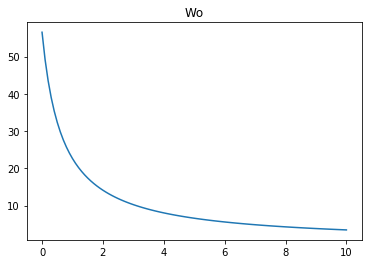

In [35]:
plt.plot(lambda_values, W_List[:,0])
plt.title('Wo')

Text(0.5, 1.0, 'W1')

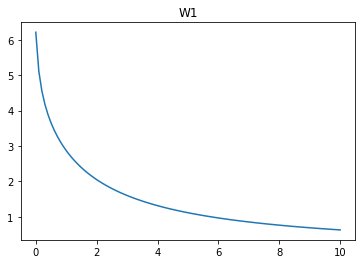

In [37]:
plt.plot(lambda_values, W_List[:,1])
plt.title('W1')

Text(0.5, 1.0, 'W2')

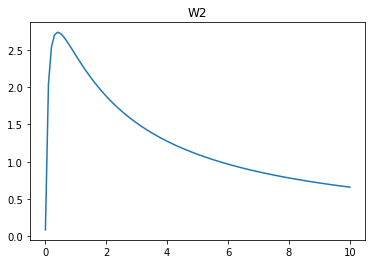

In [39]:
plt.plot(lambda_values, W_List[:,2])
plt.title('W2')

Text(0.5, 1.0, 'W3')

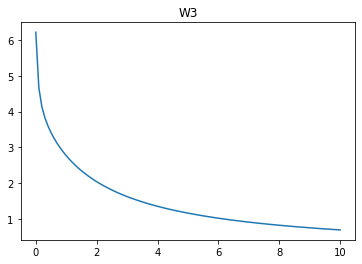

In [41]:
plt.plot(lambda_values, W_List[:,3])
plt.title('W3')

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Теоретически можно, но последствия таких действий сделают данные бессмысленными для аналитики, так как  мы просто безрезультатно потеряем нормальное распределение наших данных

#### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [ ]:
def eval_model_reg_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8, qty_in_batch=4):
    W = np.random.randn(X.shape[0])   # случайные первичные коэффициенты для запуска                    
    n = X.shape[1]                    # размер выборки
    n_batch = n // qty_in_batch       # кол батчей
    
    
    if n % qty_in_batch != 0:         # в случае не равного деление добавляем батч
        n_batch += 1

                                      # запуск градиентого спуска
    for i in range(1, iterations+1):  
        for b in range(n_batch):
            start_ = qty_in_batch*b     # Начало по индексам
            end_ = qty_in_batch*(b+1)   # Конце по индексам
            
           #print(b, n_batch, start_, end_)
            
            X_tmp = X[:, start_ : end_]    # [Признаки, наблюдения]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)  
                                               #Q(w,X)            + L1= Л* |W|
            W -= alpha * (2 * X_tmp @ (y_pred_tmp - y_tmp) / n + lambda_ * np.sign(W)  
    return W